In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors  
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pickle as pkl

data_set=pd.read_csv('diabetes.csv')

x=data_set.iloc[:,[0,1,2,3,4,5,6,7]].values
y=data_set.iloc[:,8].values

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

classifier = LogisticRegression()
classifier.fit(x_train , y_train)

y_pred = classifier.predict(x_test)

print('ENTER DATA OF PATIENT')
Pregnancies = input('Pregnancies:')
Glucose = input('Glucose:')
BloodPressure = input('BloodPressure:')
SkinThickness = input('SkinThickness:')
Insulin = input('Insulin:')
BMI = input('BMI:')
DiabetesPedigreeFunction = input('DiabetesPedigreeFunction:')
Age = input('Age:')
input_sample = (Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)
input_np_array = np.asarray(input_sample)
input_reshape = input_np_array.reshape(1 , -1)
std_data = scaler.transform(input_reshape)
prediction = classifier.predict(std_data)


if(prediction[0]==0):
    print('""',"PATIENT IS NOT DIABETIC",'""')
else:
    print('""',"PATIENT IS DIABETIC",'""')
    
print("Model_Accuracy:",accuracy_score(y_test , y_pred)*100 , "%" , )

# pickle model
pickle_out=open("classifier.pkl","wb")
pkl.dump(classifier,pickle_out)
pickle_out.close()

# GRAPH
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})  
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60", "#000000", "#FFFFFF"]  
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60", "#000000", "#FFFFFF"])
# features
to_be_plotted = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]  
print("DIABETIES PREDICTION GRAPH")  
plt.figure()
sns.pairplot(data_set[to_be_plotted], hue= "Outcome",palette= (["#682F2F","#F3AB60"])) 
plt.show()  

ENTER DATA OF PATIENT
"" PATIENT IS NOT DIABETIC ""
Model_Accuracy: 82.46753246753246 %


DIABETIES PREDICTION GRAPH


c:\Users\eradn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

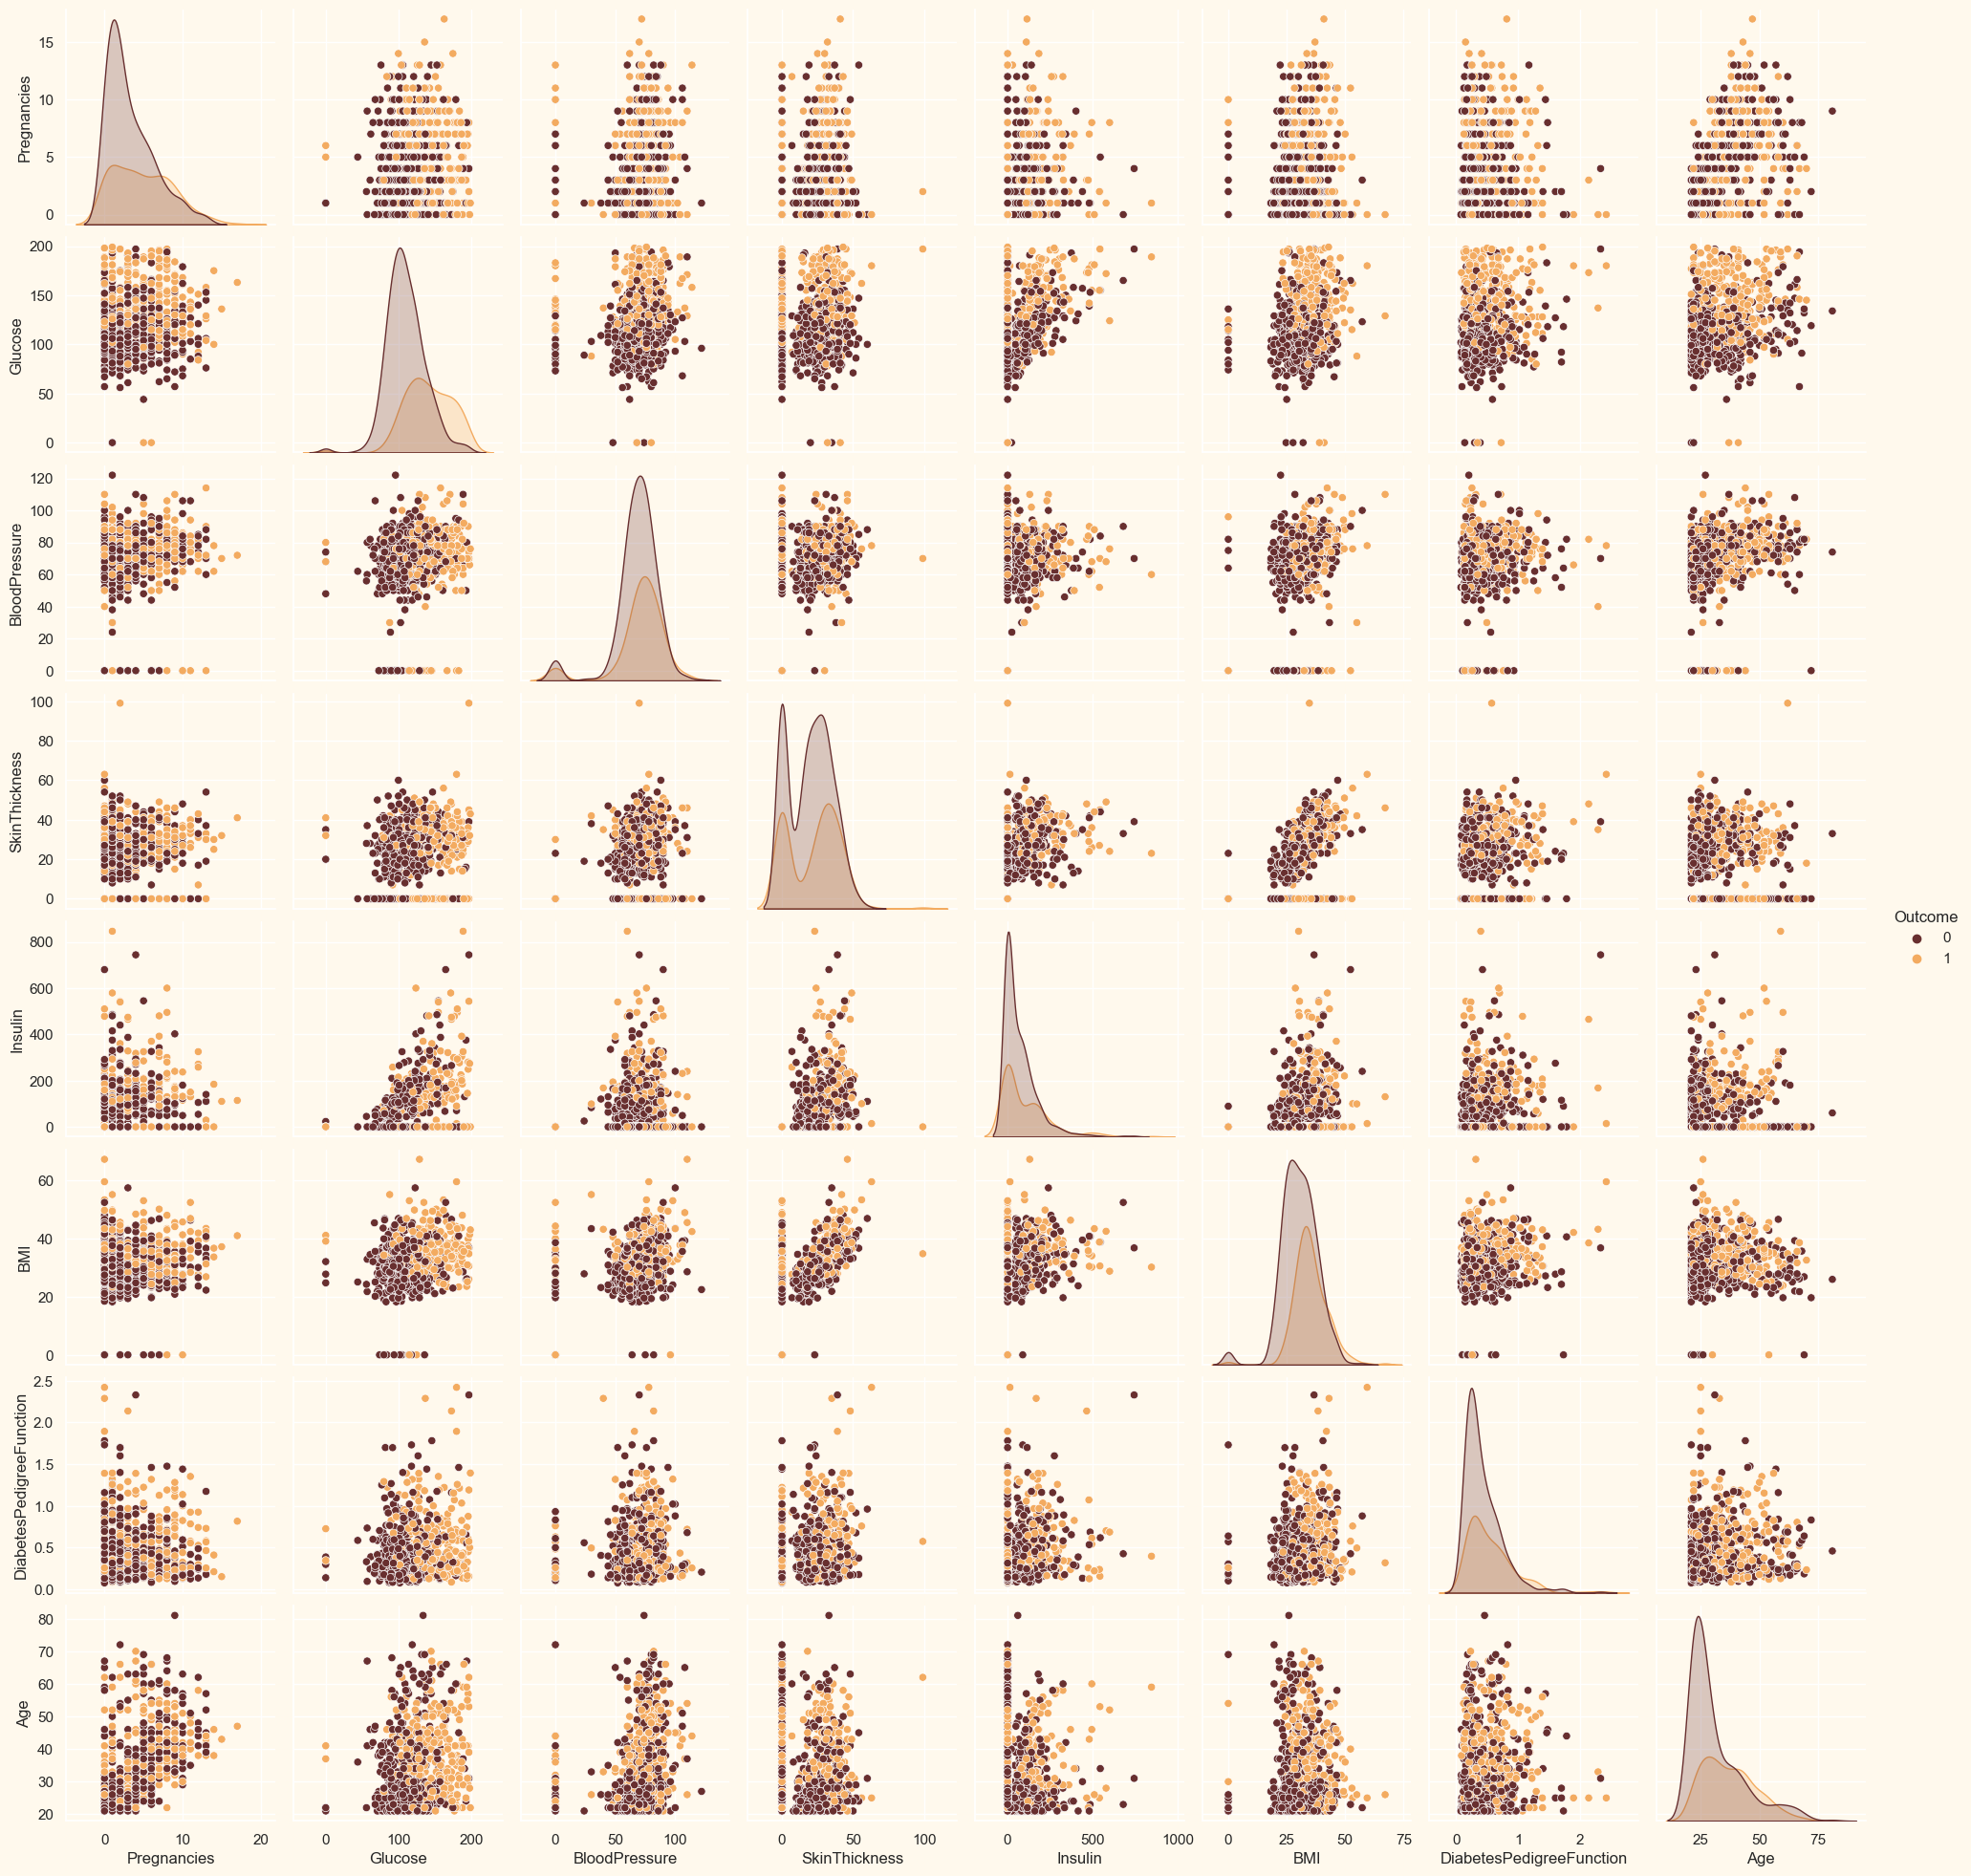